<a href="https://colab.research.google.com/github/Venchislav/Stats-for-DS/blob/main/TukeyHSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

In [5]:
MultiComp = MultiComparison(data['expr'], data['Therapy'])
print(MultiComp.tukeyhsd())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333 0.9514  -5.5959  3.7292  False
     A      C  -5.3333 0.0189  -9.9959 -0.6708   True
     A      D     -7.4 0.0005 -12.0626 -2.7374   True
     B      C     -4.4  0.071  -9.0626  0.2626  False
     B      D  -6.4667 0.0029 -11.1292 -1.8041   True
     C      D  -2.0667 0.6458  -6.7292  2.5959  False
-----------------------------------------------------


Text(0.5, 1.0, '95% family-wise confidence level')

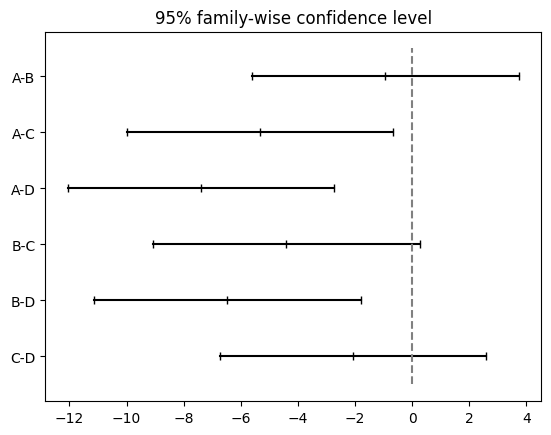

In [8]:
data = MultiComp.tukeyhsd()._results_table.data
df = pd.DataFrame(data[1:], columns=data[0])

df['category'] = df['group1'] + ['-'] * len(df) + df['group2']
df['orderby'] = range(len(df), 0, -1)

for lower, upper, meandiff, y in zip(df['lower'], df['upper'], df['meandiff'], df['orderby']):
    plt.plot((lower, upper),(y, y), '|-', color='black')
    plt.plot(meandiff, y ,'|-', color='black')

plt.yticks(df['orderby'], df['category'])
plt.vlines(0, df['orderby'].min() - 0.5, df['orderby'].max() + 0.5, linestyles='dashed', color='gray')
plt.title('95% family-wise confidence level')